In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/floatpop/20190601.csv')

In [3]:
df.columns

Index(['dailyid', 'year', 'month', 'day', 'dayofweek', 'hour', 'minute',
       'latitude', 'longitude', 'os', 'home_countryname', 'plmn',
       'plmn_countryname', 'setting_currency', 'setting_language',
       'setting_country', 'logtype_category', 'logtype_subcategory',
       'accuracy', 'speed', 'estimated_speed_flag', 'course',
       'estimated_course_flag', 'prefcode', 'citycode', 'mesh100mid',
       'home_prefcode', 'home_citycode', 'workplace_prefcode',
       'workplace_citycode', 'transportation_type', 'datetime'],
      dtype='object')

In [4]:
df1 = (df.groupby('dailyid')
.size()
.reset_index(name = 'counts')
)

In [5]:
np.mean(df1['counts'])

42.86264072130813

In [6]:
max(df1['counts'])

2342

In [7]:
min(df1['counts'])

1

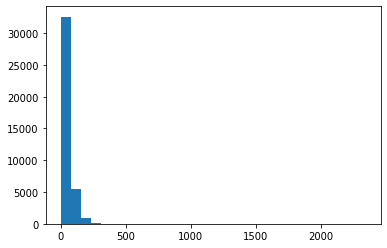

In [8]:
plt.hist(df1['counts'], bins=30)
plt.show()

In [9]:
maxid = df1[df1.counts == max(df1['counts'])]['dailyid'].values[0]

In [10]:
df2 = df[df['dailyid'] == maxid]

In [11]:
df2.columns

Index(['dailyid', 'year', 'month', 'day', 'dayofweek', 'hour', 'minute',
       'latitude', 'longitude', 'os', 'home_countryname', 'plmn',
       'plmn_countryname', 'setting_currency', 'setting_language',
       'setting_country', 'logtype_category', 'logtype_subcategory',
       'accuracy', 'speed', 'estimated_speed_flag', 'course',
       'estimated_course_flag', 'prefcode', 'citycode', 'mesh100mid',
       'home_prefcode', 'home_citycode', 'workplace_prefcode',
       'workplace_citycode', 'transportation_type', 'datetime'],
      dtype='object')

In [12]:
df2[['hour', 'minute']].groupby('hour').size()

hour
10     25
11    825
13    442
14      9
15    849
18    192
dtype: int64

In [13]:
np.median(df1['counts'])

27.0

In [14]:
geq300 = df1[df1['counts'] > 200]['dailyid'].values

In [15]:
df_subset = df[df.dailyid.isin(geq300)]

In [16]:
df_subset[['hour', 'minute']].groupby('hour').size()

hour
10    7583
11    9320
12    8592
13    8638
14    8299
15    8854
16    8497
17    8263
18    8055
19    7034
20    6628
21    5950
22    4426
23    3000
dtype: int64

In [17]:
df_subset = df[['dailyid', 'hour']]

In [18]:
df_subset.groupby('dailyid', 'hour').size()

ValueError: No axis named hour for object type DataFrame

In [21]:
subset = df1[df1.counts >= 100].dailyid.values

In [22]:
df_subset = df[df.dailyid.isin(subset)]

In [23]:
df_subset = df_subset[['dailyid', 'hour']]

In [24]:
df_subset = df_subset.groupby(['dailyid', 'hour']).size().reset_index(name='counts')

In [25]:
df_subset.dailyid.unique()

array(['000ed5ec3e34be914501c3850b8e17c28cccffd050714695d685fc54a0e103fd164ec05582bff289d003d61a7d15e3e3',
       '001390caedf98bceb08fdfb03322130e5465f2e5b7247a245bb8c0cda3b076cb3ea6f820204d530c64d414cad99c72ef',
       '00374a683350ab9b09415b41fc8ae0724fcd93b47474f0d5876833ad0f23fc495243b86be9a1952a54c14a3a61a34837',
       ...,
       'ff9a81afe209374036da3372b7eee61b4219e976e22d979868a68fd8bceea6b2d946e6a8aec4effb82002f87289c90bf',
       'ffe74bb7098c5b9d7ca052cbe7da90cfeff4aad39a01dda8c527475c2aee904f533381476156bfc4d3303f2b7dd42c42',
       'ffe9c3c4cf49e729cfe898cf676aeec1c2ad242a404ebe61e36668ee587151b52ce59880c513059d600a4a0766176853'],
      dtype=object)

In [26]:
import folium

In [27]:
test_subject = df_subset.dailyid.unique()[51]
locs = df[df.dailyid == test_subject][['latitude', 'longitude']].to_numpy()

# generate map
m = folium.Map(location=locs[0,:], zoom_start=10)
folium.PolyLine(locs, color='red', weight=5, opacity=0.7).add_to(m)
m